<a href="https://colab.research.google.com/github/J0hnV1ct0r/Rpad/blob/main/Regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [101]:
dados=pd.read_csv('/content/drive/MyDrive/rpad/artificial1d.csv')
dados = dados.rename(columns={dados.columns[0]: 'x', dados.columns[1]: 'y'})
dados

,x,y
0,-0.931034,-1.326980
1,-0.862069,-1.105598
2,-0.793103,-0.873946
3,-0.724138,-0.285027
4,-0.655172,-0.431153
5,-0.586207,-0.794754
6,-0.517241,-0.886068
7,-0.448276,-0.899900
8,-0.379310,-0.861844
9,-0.310345,-0.888052


# Modelo

In [102]:
class LinearRegression:
  def __init__(self,opt='SGD'):
    self.w1=0.0
    self.w0=0.0
    self.opt=opt
    self.losses=[]
    self.w1_hist=[]
    self.w0_hist=[]

  def fit(self, X, y, lr=0.001, epochs=100):

    if self.opt=='SGD':
      self.fit_SGD(X, y, lr, epochs)

    elif self.opt=='GD':
      self.fit_GD(X, y, lr, epochs)

    elif self.opt=='OLS':
      self.fit_OLS(X, y)
    else:
      print('otimizador não encontrado')

  def fit_SGD(self, X, y, lr=0.001, epochs=100):
    for i in range(epochs):
      errors=[]
      indices = list(range(len(X)))
      random.shuffle(indices)

      for sample in indices:
        #Calculo dos erros
        y_pred=self.w1*X[sample]+self.w0
        error=y[sample]-y_pred
        errors.append(error)

        #ajuste dos Ws
        self.w0=self.w0+lr*error
        self.w1=self.w1+lr*error*X[sample]

        #Salvamento do historico de Ws
        self.w1_hist.append(self.w1)
        self.w0_hist.append(self.w0)

      #Calculo da loss
      loss=self.loss_function(errors)
      self.losses.append(loss)

  def fit_GD(self, X, y, lr=0.001, epochs=100):
    for i in range(epochs):
      errors=[]

      #Calculo dos erros
      for sample in range(len(X)):
        y_pred=self.w1*X[sample]+self.w0
        error=y[sample]-y_pred
        errors.append(error)

      #ajuste dos Ws
      self.w0=self.w0+lr*(sum(errors)/len(X))
      self.w1=self.w1+lr*(sum([errors[sample]*X[sample] for sample in range(len(X))])/len(X))

      #Salvamento do historico de Ws
      self.w1_hist.append(self.w1)
      self.w0_hist.append(self.w0)

      #Calculo da loss
      loss=self.loss_function(errors)
      self.losses.append(loss)


  def fit_OLS(self, X, y):
    pass

  def loss_function(self, errors):
    loss = sum([error**2 for error in errors])/(2*len(errors))
    return loss

  def predict(self, X):
    y_pred=[]
    for sample in X:
      y_pred.append(self.w1*sample+self.w0)
    return y_pred

# Teste do modelo

In [103]:
train, test = train_test_split(dados, test_size=0.2)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

Modelo com otimizador GD

In [104]:
lr_gd = LinearRegression(opt='GD')

In [105]:
lr=0.1
epochs=200
lr_gd.fit(train['x'], train['y'],lr,epochs)

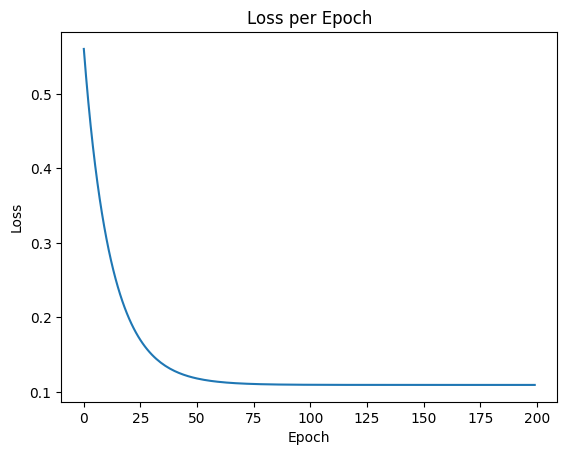

In [106]:
plt.plot(range(len(lr_gd.losses)), lr_gd.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()

In [107]:
y_pred = lr_gd.predict(test['x'])
test['y_pred_gd'] = y_pred
test

,x,y,y_pred_gd
0,0.103448,0.097478,0.251970
1,-0.655172,-0.431153,-0.885561
2,0.034483,0.348970,0.148559
3,-0.310345,-0.888052,-0.368501
4,0.448276,1.149101,0.769030
5,-0.172414,-0.719568,-0.161677


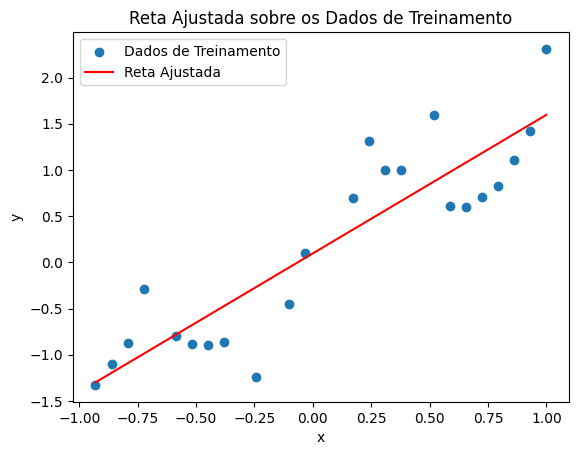

In [108]:
# Gerar pontos para a reta ajustada (usando intervalo de x do conjunto de treinamento)
x_reta = np.linspace(train['x'].min(), train['x'].max(), 100)
y_reta = lr_gd.w0 + lr_gd.w1 * x_reta

# Plotar os dados de treinamento e a reta ajustada
plt.scatter(train['x'], train['y'], label='Dados de Treinamento')  # Plotar apenas dados de treinamento
plt.plot(x_reta, y_reta, color='red', label='Reta Ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Reta Ajustada sobre os Dados de Treinamento')
plt.legend()
plt.show()

Modelo com otimizador sdg

In [109]:
lr_sgd = LinearRegression(opt='SGD')

In [110]:
lr=0.1
epochs=200
lr_sgd.fit(train['x'], train['y'],lr,epochs)

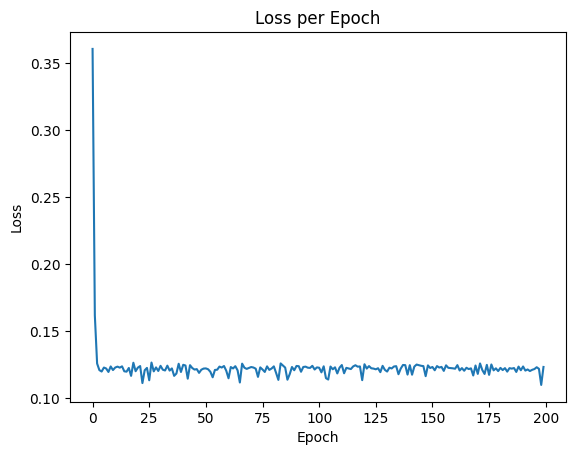

In [111]:
plt.plot(range(len(lr_sgd.losses)), lr_sgd.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()

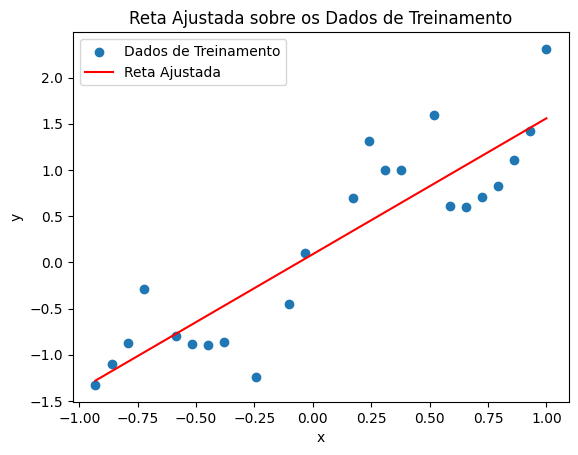

In [112]:
# Gerar pontos para a reta ajustada (usando intervalo de x do conjunto de treinamento)
x_reta = np.linspace(train['x'].min(), train['x'].max(), 100)
y_reta = lr_sgd.w0 + lr_sgd.w1 * x_reta

# Plotar os dados de treinamento e a reta ajustada
plt.scatter(train['x'], train['y'], label='Dados de Treinamento')  # Plotar apenas dados de treinamento
plt.plot(x_reta, y_reta, color='red', label='Reta Ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Reta Ajustada sobre os Dados de Treinamento')
plt.legend()
plt.show()

In [98]:
y_pred = lr_sgd.predict(test['x'])
test['y_pred'] = y_pred
test

,x,y,y_pred_gd,y_pred
0,0.379310,1.003182,0.689946,0.734347
1,-0.793103,-0.873946,-1.106170,-1.048258
2,0.034483,0.348970,0.161677,0.210051
3,0.655172,0.594416,1.112562,1.153783
4,-0.103448,-0.452023,-0.049631,0.000333
5,-0.379310,-0.861844,-0.472246,-0.419104
